$$
\newcommand{theorem}{\textbf{Theorem: }}
\newcommand{proof}{\textbf{Proof: }}
\newcommand{lemma}{\textbf{Lemma: }}
\newcommand{corollary}{\textbf{Corollary: }}
\newcommand{prop}{\textbf{Proposition: }}
$$

$$
\newcommand{arr}{\mathbf}
\newcommand{inv}{^{-1}}
\newcommand\mat[1]{\begin{pmatrix}#1\end{pmatrix}} 
\newcommand\det[1]{\left| #1\right|} 
\newcommand\norm[1]{\lVert #1\rVert} 
\newcommand\set[1]{\left\{#1\right\}} 
$$

In [2]:
import sys

sys.path.append("..")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from module.elimination import gauss_jordan_elim, gaussian_elim
from common.utility import show_implementation

np.set_printoptions(edgeitems=10, linewidth=180)

# Orthogonal projection

## Orthogonal basis

$\theorem$:
A [orthogonal set](./euclidean_space.ipynb#Orthogonality) set  of nonzero vectors is [linearly independent](./euclidean_space.ipynb#Linear-independence).

<details>
<summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
        Suppose that it is not linearly independent.
        Then there exists coefficients $c_i$'s such that
        $$
        c_1 \arr u_1 + c_2 \arr u_2 \cdots + c_k \arr u_k = \arr 0 
        $$
        Now we consider any $\arr u_j$.
        Notice that 
        $$
        \begin{align}
        0 = &\arr u_j \cdot \arr 0 = \arr u_j \cdot (\sum _{i = 1} ^ k c_i \arr u_i) \\
        &= \sum _{i = 1} ^ k c_i (\arr u_i \cdot \arr u_j)) \\ 
        &= c_j \arr u_j \cdot \arr u_j \quad \text{all others are zero vectors due to orthogonality} \\
        \end{align}
        $$
        But this is a contradiction as we required $\arr u_j$ to be nonzero.
        $$QED$$
    </div>
</details>

$\corollary$:
A orthogonal set with $k$ non-zero vectors in $V \subseteq \mathbb R^n$ is an orthogonal basis for $V$.

## Coordinates

The coordinates in an orthogonal basis is easy to compute.

$\theorem$:
Given $S = \set{\arr u_1, \cdots, \arr u_k}$ which is an orthogonal basis of $V \subseteq \mathbb R^n$, then for any $\arr v \in V$, the coordinate in $S$ is:
$$
(\arr v)_S = \mat{(\arr v \cdot \arr u_1) / \norm{\arr u_1}^2 \\ (\arr v \cdot \arr u_2) / \norm{\arr u_2}^2 \\ \vdots \\ (\arr v \cdot \arr u_k) / \norm{\arr u_k}^2 }
$$
<details>
<summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
        Since $S$ is a basis, we can express $\arr v$ as 
        $$
        \arr v = c_1 \arr u_1 + c_2 \arr u_2 \cdots + c_k \arr u_k
        $$
        Now we consider any $\arr u_j$.
        Notice that 
        $$
        \begin{align}
        \arr u_j \cdot \arr v &= \arr u_j \cdot (\sum _{i = 1} ^ k c_i \arr u_i) \\
        &= c_j \arr u_j \cdot \arr u_j \quad \text{by similar logic of previous proof} \\
        &= c_j \norm{\arr u_j}^2 \\\\
        \Rightarrow c_i &= \frac{\arr u_j \cdot \arr v}{\norm{\arr u_j}^2}
        \end{align}
        $$
        $$QED$$
    </div>
</details>

$\corollary$:
If $S$ was also orthonormal, then 
$$
(\arr v)_S = \mat{(\arr v \cdot \arr u_1) \\ (\arr v \cdot \arr u_2)  \\ \vdots \\ (\arr v \cdot \arr u_k) }
$$

## Orthogonal to subspace

Given some subspace $V \subseteq \mathbb R^n$, a vector $\arr n \in \mathbb R^n$ is orthogonal to $V$ if every $\arr v \in V$ is orthogonal to it, _ie_ $\arr n \cdot \arr v = 0$.
We denote this as $\arr n \perp V$.

$\arr 0 \perp V$ for any subspace $V$.

$V = span \set{\mat{1 \\0 \\ 0}, \mat{0 \\ 1\\ 0}} \perp \mat{0 \\ 0 \\1}$.

$\theorem$:
Let $V \subseteq \mathbb R^n$ and $S = \set{\arr u_1, \dots, \arr u_k}$ be the basis for $V$, then $\arr w \perp V$ if and only if $\arr w \in Null(\arr A^T)$, where $\arr A = \mat{\arr u_1 & \cdots & \arr u_k}$.
<details>
<summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
        $\arr w \cdot \arr v = 0$ for all $\arr v \in V$ $\Leftrightarrow \arr v^T \arr w = 0$.
        This implies that $\arr u_i^T \arr w = 0$ since $\arr v$ is a linear combination of $\arr u_i$'s.
        Hence, $$\mat{\arr u_1^T \\ \arr u_2^T \\ \vdots \\ \arr u^T_k} \arr w = \arr A^T \arr w= \arr 0$$
        $$QED$$
    </div>
</details>

## Orthogonal projection

$\theorem$:
Let $V \subseteq \mathbb R^n$ be a subspace.
Every vector $\arr w \in \mathbb R^n$ can be expressed uniquely as
$$
\arr w = \arr w_p + \arr w_n
$$
where $\arr w_n$ is orthogonal to $V$ and $\arr w_p \in V$.



The unique vector $\arr w_p$ is call the **orthogonal projection** of $\arr w$ onto $V$.

If $\arr S = \set{\arr u_1, \dots, \arr u_k}$ is an orthonormal basis for $V$, then
$$
\arr w_p = (\arr w \cdot \arr u_1) \arr u_1 + (\arr w \cdot \arr u_2) \arr u_2 + \cdots + (\arr w \cdot \arr u_k) \arr u_k
$$

We can see that $\arr w_p \in V$ because it is a linear combination of $\arr u_i$'s.

And we note that for any vector $\arr u_i$ in the basis,

$$
\begin{align}
\arr w_n &= \arr w - \arr w _p \\ 
\arr w_n \cdot \arr u_i &= \arr w \cdot \arr u_i - \arr w _p \cdot \arr u _i \\ 
&= \arr w \cdot \arr u_i - \sum_{j = 1}^k  (\arr w \cdot \arr u_j) \arr u_j \cdot \arr u_i  \\ 
&= \arr w \cdot \arr u_i - (\arr w \cdot \arr u_i) \arr u_i \cdot \arr u_i  \qquad (\text{other values are 0 due to orthogonality of basis})\\ 
&= \arr w \cdot \arr u_i - (\arr w \cdot \arr u_i) \qquad (\arr u_i \cdot \arr u_i = 0 \text{ due to it being a normal vector})\\ 
&= 0 
\end{align}
$$
which means $\arr w_n$ is indeed orthogonal to $V$.


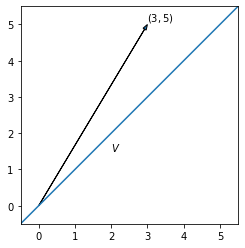

In [3]:
plt.axis('scaled')
plt.xlim(-0.5, 5.5)
plt.ylim(-0.5, 5.5)
plt.arrow(0, 0, 3, 5, head_width=0.1, length_includes_head=True)
plt.plot([-1, 6], [-1, 6])
plt.annotate(r'$V$', (2, 1.5))
plt.annotate(r'$(3, 5)$', (3, 5.1))
plt.show()

From above, our subspace is 1-dimensional, while our $\arr w  = \mat{3 \\ 5} \in \mathbb R^2$.
(Our basis would be $\set{\frac{1}{\sqrt 2} \mat{1 \\ 1}}$).

$\arr w_p$ would be $(\arr w \cdot \arr u_1) \arr u_1 = \frac{3 + 5}{\sqrt 2} \left(\frac{1}{\sqrt 2} \mat{1 \\ 1} \right) = \mat{4 \\ 4}$.

And $\arr w_n = \mat{3 \\ 5} - \mat{4 \\ 4} = \mat{-1 \\ 1}$.

Visually, it would be as per below:

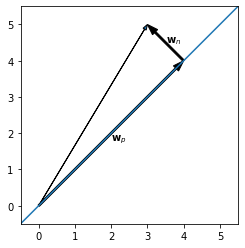

In [4]:
plt.axis('scaled')
plt.xlim(-0.5, 5.5)
plt.ylim(-0.5, 5.5)
plt.arrow(0, 0, 3, 5, head_width=0.1, length_includes_head=True)
plt.plot([-1, 6], [-1, 6])
plt.arrow(0, 0, 4, 4, width=0.05, head_width=0.2, length_includes_head=True,color='black')
plt.annotate(r'${\bf w}_p$', (2, 1.8))
plt.annotate(r'${\bf w}_n$', (3.5, 4.5))
plt.arrow(4, 4, -1, 1, width=0.05, head_width=0.2, length_includes_head=True,color='black')
plt.show()

## Gram-Schmidt process

Given some basis, it would be beneficial for us to construct an orthonormal basis that spans the same subspace, seeing previously that it is easier to work with orthonormal basis.

The **Gram-Schmidt process** allows us to do just that.

It is an iterative algorithm which produces us an orthogonal basis from some basis $S = \set{\arr u_1, \dots, \arr u_k}$:
1. Let $S' = \set{u_1}$
2. For each $\arr u_i$ for $2 \leq u \leq k$:
    1. Find $\arr w_p$ by projecting $\arr u_i$ onto $S'$
    2. Find $\arr w_n = \arr u_i - \arr w_p$
    3. Add $\arr w_n$ to $S'$
3. $S'$ will be the orthogonal basis

If we want an orthonormal basis, we simply normalize $S'$.

In [5]:
def norm(u):
    return np.sum(u ** 2)
def project(w:np.ndarray, S: [np.ndarray]) -> np.ndarray:
    return np.sum([np.dot(w, u) * u / norm(u) for u in S], axis=0)

In [6]:
def gram_schmidt(S: [np.ndarray]) -> [np.ndarray]:
    Sp = [S[0]]
    
    for u in S[1:]:
        v = u - project(u, Sp)
        Sp.append(v)
    
    return Sp

In [7]:
u1 = np.array([1, 2, 1])
u2 = np.array([1, 1, 1])
u3 = np.array([1, 1, 2])
gram_schmidt([u1, u2, u3])

[array([1, 2, 1]),
 array([ 0.33333333, -0.33333333,  0.33333333]),
 array([-0.5,  0. ,  0.5])]

Hence, one way of obtaining a orthogonal projection given some $\arr w$ and basis $S$, is to obtain an orthonormal projection via Gram-Schmidt process, then finding the projection using the orthonormal projection.

## Least squares approximation

Suppose that we have some experimental data, which consists of inputs $\arr A$ and outputs $\arr b$.

We wish to find the solution $\arr x$ such that $\arr {Ax} = \arr b$.

However, in real life, there are minute errors in the measurements which leads to there being no solution to the system of $\arr {Ax} = \arr b$.
For example, suppose that our theoretical system is as per below:
$$
x + y = 3 \\
2x + y = 4 \\
x + 2y = 5 \\
$$
where the solution is $x = 1, y = 2$.

In [8]:
A = np.array([1, 1, 2, 1, 1, 2]).reshape((3, 2))
b = np.array([3, 4, 5]).reshape((3, 1))

np.hstack(gauss_jordan_elim(A, b))

array([[ 1.,  0.,  1.],
       [-0.,  0.,  0.],
       [ 0.,  1.,  2.]])

However, even a slight error will cause there to be no solution to our system:
$$
x + y = 3 \\ 
2x + y = 4.1 \\ 
x + 2y = 5 \\ 
$$

In [9]:
b = np.array([3, 4.1, 5]).reshape((3, 1))

np.hstack(gauss_jordan_elim(A, b))

array([[ 1. ,  0. ,  1.1],
       [-0. ,  0. , -0.1],
       [ 0. ,  1. ,  2. ]])

Thus, finding the least squares approximation is trying to reconcile this issue, by finding the solution which fits the constraints the best.

We wish to find a consistent system $\arr {Ax} = \arr b'$ where $\arr b'$ is closest to $\arr b$.
Note that one such solution always exists, as $\arr b' = \arr 0$ will be consistent (though $\arr 0$ may not be the closest).

$\theorem$:
$\arr u$ is the least square solution to $\arr {Ax} = \arr b$ if and only if $\arr {Au}$ is the projection of $\arr b$ onto $Col(\arr A)$.

<details>
<summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
        (Un-rigorously) we know that the projection of $\arr b$ onto $Col(\arr A)$ must give us the closest solution in the column space; because geometrically, the closest point would be orthogonal to the column space.
        <br>
        And we have seen previously that the projection will be in the column space.
        <br>
        Hence we know that $\arr b' = \arr {Au}$ must be the closest solution to $\arr b$.
            $$QED$$
    </div>
</details>

$\theorem$:
$\arr u$ is the least square solution to $\arr {Ax} = \arr b$ if and only if $\arr A^T \arr {Au} = \arr A ^T \arr b$.

<details>
<summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
        Following the previous theorem, we know that the vector from $\arr b$ to $\arr b'$ must be orthogonal to the column space.
        Therefore, 
    $$
    \arr b' - \arr b \perp Col(\arr A)\\
    \Rightarrow \arr {Au} - \arr b \perp Col(\arr A) \\
    \Rightarrow \arr {Au} - \arr b \perp  span(\set{\arr u_1, \dots, \arr u_k}\\
    $$
    <a href="#Orthogonal-to-subspace"> Recall</a> that $\arr w \perp span (\set{\arr u_1, \dots, \arr u_k})$ if and only if $\arr w \in Null(\arr A^T)$.
    Hence,
    $$
    \Rightarrow \arr {Au} - \arr b \in Null(\arr A^T)\\
    \Rightarrow \arr A^T(\arr {Au} - \arr b) = \arr 0\\
    \Rightarrow \arr A^T\arr {Au} - \arr A^T \arr b = \arr 0\\
    \Rightarrow \arr A^T\arr {Au} = \arr A^T \arr b \\
    $$
        $$QED$$
    </div>
</details>

In [10]:
np.hstack(gauss_jordan_elim(A.T @ A, A.T @ b))

array([[1.        , 0.        , 1.06363636],
       [0.        , 1.        , 1.96363636]])

(Another example is [here](../neural_network/perceptron.ipynb#Example))

This also gives us a way of finding an orthogonal projection without constructing an orthonormal basis.

$\theorem$:
Given $S = \set{\arr u_1, \dots, \arr u_k}$ be a basis for $V \subseteq \mathbb R^n$, the orthogonal project of $\arr w \in \mathbb R^n$ onto $V$ is 
$$
\arr A( \arr A^T \arr A) \inv \arr A^T \arr w
$$
where $\arr A = \mat{\arr u_1 & \arr u_2 & \cdots  & \arr u_k}$.

<details>
<summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
        Combining the above 2 theorems, we know that if $\arr u$ is the least square solution to $\arr {Ax} = \arr b$, then $\arr {Au}$ is a projection onto $Col(\arr A) = V$.
        And we know that $\arr u$ is the least square solution if and only if $\arr A^T \arr A \arr u = \arr A^T  \arr b$.
        $$
        \begin{align}
        \arr A^T \arr A \arr u &= \arr A^T  \arr b \\
        \arr u &= (\arr A^T \arr A) \inv  \arr A^T  \arr b \quad \text{$S$ is a basis, therefore $\arr A$ is invertible} \\ 
        \arr A \arr u &= \arr A(\arr A^T \arr A) \inv  \arr A^T  \arr b 
        \end{align}
        $$
        $$QED$$
    </div>
</details>

In [4]:
A = np.array([1, 1]).reshape((2, 1))
w = np.array([3, 5]).reshape((2, 1))

A @ np.linalg.inv(A.T @ A) @ A.T @ w

array([[4.],
       [4.]])

As per our previous example, we do also get $\mat{4 \\ 4}$ as the projection.

Since $\arr b'$ must be the closest possible to $\arr b$, we have an additional constraint that:
$$
\norm{\arr {Au} - \arr b} \leq \norm{\arr {Av} = \arr b}
$$

for any $\arr v \in \mathbb R^n$.

A $n$-vector (or simply **vector**) is a ordered set of $n$ real number.

$$
\arr v = \mat{v_1 \\ v_2 \\ \vdots \\ v_n}, v_i \in \mathbb R
$$

The collection of all vectors is called a **vector space/Euclidean $n$-space**.
This is denoted by $\mathbb R^n$.

$$
\mathbb R ^n  = \left\{\mat{v_1 \\ v_2 \\ \vdots \\ v_n} \middle | v_i \in \mathbb R \right\}
$$

## Interpretation

We can either view $\arr v$ as a point in $\mathbb R^n$, or as an arrow which starts at origin $\arr 0$, and ends at $\arr v$.
Both are equally valid, and either could be more appropriate depending on the context.

We can also view a vector as a 1-D column/row matrix.

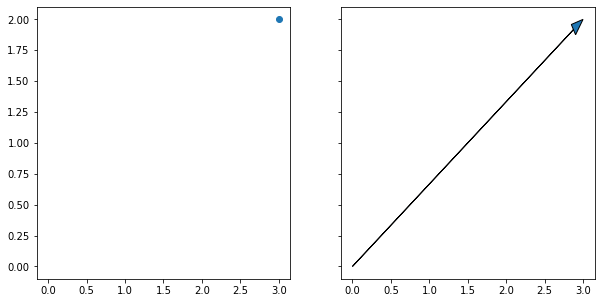

In [11]:
_, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))
ax1.scatter(3, 2)
ax2.arrow(0, 0, 3, 2, head_width=0.1, length_includes_head=True)
plt.show()

$\mathbb R^2$ can be viewed as a 2-D plane, and $\mathbb R^3$ is a 3-D space.

## Properties

Since vector can be viewed as a column matrix, they share the [same properties](matrix.ipynb#Properties-of-matrix-addition/multiplication) as matrices.

Since we can view vectors as arrows, the vector addition is simply moving the other vector to the end of the first and finding the generated vector.

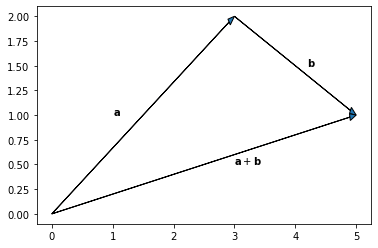

In [12]:
plt.arrow(0, 0, 3, 2, head_width=0.07, length_includes_head=True)
plt.arrow(3, 2, 2, -1, head_width=0.07, length_includes_head=True)
plt.arrow(0, 0, 5, 1, head_width=0.07, length_includes_head=True)
plt.text(1, 1, r"$\mathbf{a}$")
plt.text(4.2, 1.5, r"$\mathbf{b}$")
plt.text(3, 0.5, r"$\mathbf{a} + \mathbf{b}$")
plt.show()

Working backwards, we can also see that vector subtraction is the same as finding the vector that goes from the end of $\arr b$ to the end of $\arr a$.

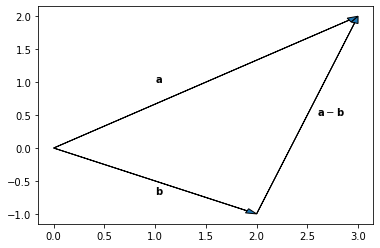

In [13]:
plt.arrow(0, 0, 3, 2, head_width=0.07, length_includes_head=True)
plt.arrow(0, 0, 2, -1, head_width=0.07, length_includes_head=True)
plt.arrow(2, -1, 1, 3, head_width=0.07, length_includes_head=True)
plt.text(1, 1, r"$\mathbf{a}$")
plt.text(1, -0.7, r"$\mathbf{b}$")
plt.text(2.6, 0.5, r"$\mathbf{a} - \mathbf{b}$")
plt.show()

## Solution of linear system

With vectors, we can now view the solution to a linear system in a different way.

The solution can either be expressed as the **implicit** or **explicit** form.

The implicit form is in the form of:
$$
\left\{ \arr v \in \mathbb R^n \middle | \arr v \text{ satisfy some conditions} \right\}
$$

The explicit form is in the form of:
$$
\left\{ \arr u + s_1 \arr v_1 + s_2 \arr v_2 + \cdots + s_k \arr v_k \middle | s_i \in \mathbb R \right\}
$$

For example, given the following linear system:

$$
\begin{matrix}
&3 x  &+2y  &-z = &1 \\
&&y  &-z = &0
\end{matrix}
$$

The implicit form would be:

$$
\left\{ \mat{x \\ y \\ z} \middle | 3x + 2y - z = 1, y -z = 0 \right\}
$$

To get the explicit form, we introduce another variable $s$ to replace $y$.

Then we get the following expressions:
$$
y - z = 0 \Rightarrow  s - z = 0 \Rightarrow z = s\\
3x + 2y - z = 1 \Rightarrow 3x + 2s - s = 1 \Rightarrow x = \frac{1 - s}{3}
$$

Therefore, the explicit form is:

$$
\left\{ \mat{\frac{1}{3} \\ 0 \\ 0} + s\mat{-\frac{1}{3} \\ 1 \\ 1} \middle | s \in \mathbb R \right\}
$$

Since this is a set of containing all possible solutions of the linear system, it is also known as the **solution set**.

## Dot product

Suppose that we wish to multiply vectors.
We cannot do matrix multiplication because their sizes do not match as they are both $(1 \times n)$.
However, if we transpose one of them, we can perform our multiplication.

For ease of notation, we define the following operators:

$$
\arr u \otimes \arr v = \arr{uv}^T
$$

This is the outer product.
This creates a $n \times n$ matrix.
We are not that interested in it for this module.

$$
\arr u \cdot \arr v = \arr{u}^T \arr v
$$

This is the **inner/dot product**.
This creates a $1 \times 1$ matrix, or could also be viewed as a scalar.

For example:
$$
\mat{1 \\ 2\\ 3} \cdot \mat{2 \\ 1\\ 1\\} = 1(2) + 2(1) + 3(1) = 7
$$

### Properties

* Symmetric: $\arr u \cdot \arr v = \arr v \cdot \arr u$
* Scalar multiplication: $c \arr u \cdot \arr v = (c \arr u) \cdot \arr v = \arr u \cdot (c \arr v)$
* Distributive: $\arr u \cdot (a \arr v + b \arr w) = a \arr u \cdot \arr v + b \arr u \cdot \arr w$
* Positive definite: $\arr u \cdot \arr u \geq 0$
    * $\arr u \cdot \arr u = 0$ if and only if $\arr u = \arr 0$

## Norm

The **norm** of a vector is defined to be:
$$
\norm{\arr u} = \sqrt{\arr u \cdot \arr u} = \sqrt{\sum u_i ^2}
$$

Geometrically, the norm corresponds to the distance of the vector's end point from the origin.

To generalize, the distance between two vectors is defined as:

$$
d(\arr u, \arr v) = \norm{\arr u - \arr v}
$$

### Properties

* $\norm{c \arr u} = \det{c} \norm{u}$

### Unit vector

A **unit vector** is a vector with norm of 1.

For any vector $\arr u \neq \arr 0$, we can **normalize** it to obtain a unit vector that has the same direction.
This is denoted by $\hat{\arr u}$
We simply divide the $\arr u$ by its norm to obtain the unit vector:
$$
\hat {\arr u} = \frac{\arr u}{\norm{\arr u}}
$$


## Angle

The angle between to vectors, $\arr u, \arr v \neq \arr 0$ can be obtained using:

$$
\theta = \arccos \frac{\arr u \cdot \arr v}{\norm{\arr u} \norm{\arr v}}
$$

### Orthogonality

Two vectors $\arr u, \arr v$ are **orthogonal** if
$$
\arr u \cdot \arr v = 0
$$

This means that either one of them is a zero vector, or $\theta = \arccos \frac{\arr u \cdot \arr v}{\norm{\arr u} \norm{\arr v}} = \arccos 0  = \frac{\pi}{2}$.

In $\mathbb R^2$, this means that the two vectors are perpendicular.

A set of vectors $\{\arr v_1, \arr v_2, \cdots \arr v_k \} \subseteq \mathbb R^n$ is said to be **orthogonal** if all $v_i$'s are pairwise orthogonal.

The set is said to be **orthonormal** if it is orthogonal, and all the vectors are unit vectors.

A quick way to check for a set's orthogonality is using [block multiplication](./matrix.ipynb#Block-multiplication).

Suppose our set is $S = \{ \arr u_1, \arr u_2, \cdots, \arr u_k \}$.
We form the matrix $\arr A = \mat{\arr u_1 & \arr u_2 & \cdots & \arr u_k}$, _ie_ the columns of $\arr A$ is the vectors in $S$.

Then we compute $\arr A^T \arr A$.

Observe that
$$
\arr A ^T \arr {A} = \mat{\arr u_1^T \\ \arr u_2 ^T \\ \vdots \\ \arr u_k^T} \mat{\arr u_1^T & \arr u_2 ^T & \vdots & \arr u_k^T} \\
= \mat {
\arr u_1^T \arr u_1 &\arr u_1^T \arr u_2 & \cdots & \arr u_1^T \arr u_k\\  
\arr u_2^T \arr u_1 &\arr u_2^T \arr u_2 & \cdots & \arr u_2^T \arr u_k\\  
\vdots & \vdots & \ddots & \vdots \\
\arr u_k^T \arr u_1 &\arr u_k^T \arr u_2 & \cdots & \arr u_k^T \arr u_k\\  
}\\
= \mat {
\arr u_1\cdot \arr u_1 &\arr u_1\cdot \arr u_2 & \cdots & \arr u_1\cdot \arr u_k\\  
\arr u_2\cdot \arr u_1 &\arr u_2\cdot \arr u_2 & \cdots & \arr u_2\cdot \arr u_k\\  
\vdots & \vdots & \ddots & \vdots \\
\arr u_k\cdot \arr u_1 &\arr u_k\cdot \arr u_2 & \cdots & \arr u_k\cdot \arr u_k\\  
}
$$

If $S$ is orthogonal, then all the non-diagonal entries will be $0$, _ie_ it is a [diagonal matrix](./matrix.ipynb#Diagonal-matrix).

If $S$ is orthonormal, then $\arr A^T \arr A = \arr I$.

In [14]:
from module.matrix import mult

u1 = np.array([1, 1, 1]).reshape((3, 1))
u2 = np.array([1, 0, -2]).reshape((3, 1))
u3 = np.array([1, -2, 1]).reshape((3, 1))

A = np.hstack((u1, u2, u3))
print('A:', A, sep='\n')
print('A^T A:', mult(A.T, A), sep='\n')

A:
[[ 1  1  1]
 [ 1  0 -2]
 [ 1 -2  1]]
A^T A:
[[ 3. -1.  0.]
 [-1.  5. -1.]
 [ 0. -1.  6.]]


Since $\arr A^T \arr A$ is not diagonal, $S$ is not orthogonal.
In fact, from the matrix, we can deduce that $\arr u_2$ and $\arr u_3$ are not orthogonal to each other.

In [15]:
from module.matrix import mult

u1 = np.array([1, 1, 1]).reshape((3, 1))
u2 = np.array([1, 0, -1]).reshape((3, 1))
u3 = np.array([1, -2, 1]).reshape((3, 1))

A = np.hstack((u1, u2, u3))
print('A:', A, sep='\n')
print('A^T A:', mult(A.T, A), sep='\n')

A:
[[ 1  1  1]
 [ 1  0 -2]
 [ 1 -1  1]]
A^T A:
[[3. 0. 0.]
 [0. 2. 0.]
 [0. 0. 6.]]


Since $\arr A^T \arr A$ is diagonal, $S$ is orthogonal.

## Linear combination

A **linear combination** of $\arr u_1, \arr u_2, \dots, \arr u_k \in \mathbb R^n$ is defined as:
$$
c_1 \arr u_1 + c_2 \arr u_2 + \cdots + c_k \arr u_k = \sum c_i \arr u_i, \quad c_i \in \mathbb R
$$

The collection of all possible linear combination of $\arr u_1, \arr u_2, \dots, \arr u_k \in \mathbb R^n$ is called the **span**, _ie_

$$
span\{\arr u_1, \arr u_2, \dots, \arr u_k \}  = \left\{ \sum c_i \arr u_i \middle | c_i \in \mathbb R \right\}
$$

This relationship is similar to that of vectors and their vector spaces.

### Check if vector is a linear combination

Suppose that we wish to find if a vector $\arr v$ is a linear combination of $\arr u_1, \dots, \arr u_k$.

Notice that this is equivalent to solving to solutions for
$$
\arr v = c_1 \arr u_1 + \cdots + c_k \arr u_k
$$

Expanding all the vectors, we get:

$$
\mat{v_1 \\ v_2 \\ \vdots \\ v_n} = 
c_1 \mat{u_{11} \\ u_{12} \\ \vdots \\ u_{1n}}
+ c_2 \mat{u_{21} \\ u_{22} \\ \vdots \\ u_{2n}}
+ \cdots 
+ c_k \mat{u_{k1} \\ u_{k2} \\ \vdots \\ u_{kn}} \\
\Rightarrow \arr v = \arr A \arr c
$$

where $\arr A$ is the matrix whose columns are $\arr u_i$, and $\arr c$ is a column matrix of the $c_i$ variables.

Thus, it reduces to solving the linear system of $\arr {Ac} = \arr v$.

In [16]:
from module.elimination import gauss_jordan_elim

def is_linear_combi(v: np.ndarray, *us: np.ndarray) -> np.ndarray | None:
    A = np.hstack(us)
    R, b = gauss_jordan_elim(A, v)
    return b if (R == np.identity(R.shape[0])).all() else None

In [17]:
print("u1:", u1, sep='\n')
print("u2:", u2, sep='\n')
print("u3:", u3, sep='\n')
is_linear_combi(np.array([1, 2, 3]).reshape(3, 1),  u1, u2, u3)

u1:
[[1]
 [1]
 [1]]
u2:
[[ 1]
 [ 0]
 [-1]]
u3:
[[ 1]
 [-2]
 [ 1]]


array([[ 2.],
       [-1.],
       [ 0.]])

Indeed, 
$$
2\mat{1 \\ 1 \\ 1} -1 \mat{1 \\ 0 \\ -1} + 0 \mat{1 \\ -2  \\1} = \mat{2 -1 \\ 2 - 0 \\ 2 +1} = \mat{1 \\ 2 \\ 3} = \arr v
$$

If $\arr v$ is not a linear combination, then the system will have no solutions.

## Standard basis

Consider the identity matrix $\arr I_n$.
We let $\arr e_i$ be the $i$-th column of the identity matrix, _ie_ 
$\arr e_1 = \mat{1 \\ 0 \\ 0}$
$\arr e_2 = \mat{0 \\ 1 \\ 0}$
$\arr e_3 = \mat{0 \\ 0 \\ 1}$
for $\arr I_3$.

Notice that for any vector $\arr v \in \mathbb R^n$, it is a linear combination of $\arr e_1, \arr e_2\, \dots, \arr e_n$ (we just set $c_i = v_i$).

Therefore, $span\{\arr e_1, \dots, \arr e_n \} = \mathbb R^n$, and we call $\set{\arr e_i, \dots, \arr e_n}$ the **standard basis** of $\mathbb R^n$.

We have seen that for a vector $\arr v$ to be a linear combination of $S = \{ \arr u_1, \dots, \arr u_k \}$, we simply solve for $\arr A \arr c = \arr v$ where $\arr A = \mat{\arr u_1 & \arr u_2 & \cdots & \arr u_k}$ .


$\theorem$:
A set $S \subseteq \mathbb R^n$ with less than $n$ vectors cannot span $\mathbb R^n$.

<details>
<summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
        $\arr A$ would have more rows than columns.
        It follows that its reduced row-echelon form must contain some zero row, and hence cannot span $\mathbb R^n$.
        $$QED$$
    </div>
</details>

$\theorem$:
For any set of vectors $S$, $\arr 0 \in span(S)$.

<details>
<summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
        This is simply the trivial solution.
        $$QED$$
    </div>
</details>

$\theorem$:
For any $\arr u, \arr v \in span(S)$ and $a,b \in \mathbb R$
$$
a \arr u + b \arr v \in span(S)
$$

<details>
<summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
        Since both of them are in the span, we express $\arr u = \arr A \arr c_1, \arr v = \arr A \arr c_2$.
        Then 
        $$
        a \arr u + b \arr v = a \arr A \arr c_1 + b \arr A \arr c_2 = \arr A \left( a \arr c_1 + b \arr c_2 \right)
        $$
        And thus, $a \arr u + b \arr v$ is a linear combination of $S$, with the coefficients of $a \arr c_1 + b \arr c_2$.
        $$QED$$
    </div>
</details>

$\theorem$:
Given two sets $S_1 = \{\arr u_1, \arr u_2, \dots \arr u_k\}, S_2 = \{\arr v_1, \arr v_2, \dots \arr v_m\},  S_1, S_2 \subseteq \mathbb R^n$.
If all $\arr v_i \in span(S_1)$, then 
$$
span(S_2) \subseteq span(S_1)
$$



$\corollary$:
If all $\arr v_i \in span(S_1)$, and all $\arr u_i \in span(S_2)$, then 
$$
span(S_2) = span(S_1)
$$



Thus, given two subsets, to check if $span(S_2) \subseteq span(S_1)$, we would need to check if there is solution to $\arr A \arr c = \arr v_i$ for all $\arr v_i$.

This is checking multiple linear systems, thus recall that [we can perform this simultaneously](./matrix.ipynb#Multiple-linear-systems).

$\corollary$:
$\arr v \in span(S)$ if and only if
$$
span(S) = span(S \cup \{ v\})
$$



## Subspace

A **subspace** is a vector space that is contained in another vectors space.
For example, the $xy$-plane in $\mathbb R^3$.

Formally, a set $V \subseteq \mathbb R^n$ is a subspace if:
1. $\arr 0 \in V$ (contain origin)
2. $\alpha \arr u + \beta \arr v \in V$ (closed under linear combination)

We require the above property to ensure that $V$ have the properties of a vector space.

The **zero space** is the subspace that contains only the origin.
It is the only subspace with finitely many vectors.

$\theorem$:
$V \subseteq R^n$ is a subspace if and only if there exists a finite set $S \subseteq R^n$ such that $V = span(S)$.

<details>
<summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
        TODO
    </div>
</details>

### Examples

Subspaces of $\mathbb R^1$:
1. Zero space
2. Whole $\mathbb R^1$

Subspaces of $\mathbb R^2$:
1. Zero space
2. Line: $span \left\{\mat{x \\y} \right\} $ for nonzero vectors
3. Whole $\mathbb R^2$

Subspaces of $\mathbb R^3$:
1. Zero space
2. Line: $span \left\{\mat{x \\y \\ z} \right\} $ for nonzero vectors
3. Plane: $span \left\{ \mat{x_1 \\y_1 \\z_1 }, \mat{x_2 \\y_2 \\z_2 } \right\}$ where the vectors are not multiples of each other
4. Whole $\mathbb R^3$

<span id="solution-set-subspace"></span>
                                      
$\theorem$:
The solution set $\left\{ \arr u \middle | \arr {Au} = \arr b \right \}$ to a linear system $\arr {Ax} = \arr b$ is a subspace if and only if $\arr b = \arr 0$.

<details>
<summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
        Suppose that the solution set is a subspace.
        Thus, the solution set must contain $\arr 0$ by property of subspaces, and hence $\arr b = \arr {Au} = \arr {A 0} = \arr 0$.
        <br>
        Suppose that $\arr b = \arr 0$.
        Then the solution set must contain the trivial solution, and hence must contain $\arr 0$.
        Now suppose that $\arr u, \arr v$ are two solutions in the solution set.
        Then consider their linear combination $\arr w$
        $$
        \arr A \arr w = \arr A(a \arr u + b \arr b) = a \arr {Au} + b \arr {Av} = a \arr 0 + b \arr 0 = \arr 0
        $$
        which means $\arr w$ is also in the solution set.
        Therefore, the solution set satisfy the properties of a subspace and hence is one.
        $$QED$$
    </div>
</details>

$\theorem$:
The solution set $U = \left\{ \arr u \middle | \arr {Au} = \arr b \right \}$ to a linear system $\arr {Ax} = \arr b$ can be expressed as $U = \arr u + V$, where $V = \left\{ \arr v \middle | \arr {Av} = \arr 0 \right \}$ (solution set to the homogeneous system) and $\arr{Au}_p = \arr b$ ($\arr u_p$ is a particular solution).

<details>
<summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
        Suppose we have the solution set $V$.
        Then for any vector $\arr v$ in it, we consider $\arr u_p + \arr v$.
        $$
        \arr A(\arr u_p + \arr v) = \arr {Au_p} + \arr {Av} = \arr b + \arr 0 = \arr b
        $$
        which means it is a solution to the linear system.
        Therefore, $V + \arr u_p \subseteq U$.
        <br>
        Suppose we have the solution set $U$.
        For any vector $\arr u$ in it, we consider $\arr u - \arr u_p$,
        $$
        \arr A(\arr u - \arr u_p) = \arr {Au} - \arr{Au}_p = \arr b - \arr b = \arr 0
        $$
        which means $\arr u - \arr u _p = \arr v$ is a solution to the homogeneous system.
        Rearranging, we get $\arr u = \arr v + \arr u_p$, which means that every solution in $W$ can be written as $\arr v + \arr u_p$.
        Hence, $U \subseteq V + \arr u_p$.
        <br>
        Using the above, we get $U = V + \arr u_p$
        $$QED$$
    </div>
</details>

In order words, to find all the possible solutions to a linear system, we just need to find all the possible solutions to the homogeneous system, and any particular solution to the linear system.

For example, suppose our linear system has $\arr A = \mat{1 & 1 \\ 0 & 0}, \arr b = \mat{3 \\ 0}$.

The homogeneous solution satisfies $x + y = 0 \Rightarrow x = -y$.
Hence $V = \left\{ s\mat{1 \\ -1} \middle | s \in \mathbb R \right\}$.

Visually, the solution set can be plotted as below.

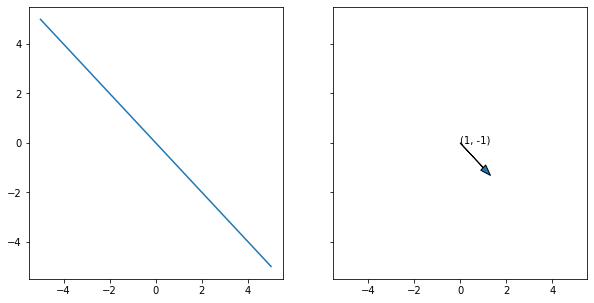

In [18]:
_, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

xs = np.linspace(-5, 5)
ys = -xs
axs[0].plot(xs, ys)
axs[1].arrow(0, 0, 1, -1, head_width=0.3)
axs[1].annotate("(1, -1)", (0, 0))
plt.show()

Notice that this is simply the line of $x = -y$.
And if we consider the solution as a vector starting from the origin, we can see that it is a scaled vector of $\mat{1 \\ -1}$.

Hence, this is the relationship between the solution of the homogeneous system and its corresponding subspace.

Back to our non-homogeneous system, one particular solution is $\mat{3 \\ 0}$.

Hence $U = \left\{ \mat{3 \\ 0} + s\mat{1 \\ -1} \middle | s \in \mathbb R \right\}$.

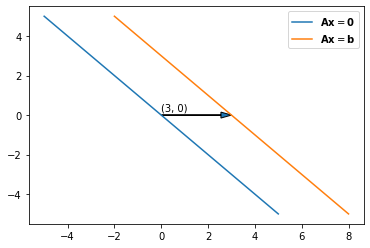

In [19]:
xs = np.linspace(-5, 5)
ys = -xs
plt.plot(xs, ys, label=r"$\mathbf{Ax}=\mathbf{0}$")
plt.plot(xs+ 3, ys, label=r"$\mathbf{Ax}=\mathbf{b}$")
plt.arrow(0, 0, 3, 0, head_width=0.3, length_includes_head=True)
plt.annotate("(3, 0)", (0, 0.2))
plt.legend()
plt.show()

Hence, the solution space of the non-homogeneous system is simply the solution space of the homogeneous solution "shifted" by the particular solution.

## Linear independence

Suppose that 
$$
\arr u _1 = \mat{1 \\ 0 \\ 0} \quad
\arr u _2 = \mat{0 \\ 1 \\ 0} \quad
\arr u _3 = \mat{-1 \\ 1 \\ 0} \quad
\arr u _4 = \mat{-1 \\ 0 \\ 0} \quad
$$

We can compute and realize that 
$$
span \set{\arr u_1, \arr u_2, \arr u_3, \arr u_4}
= span \set{\arr u_1, \arr u_2, \arr u_3}
= span \set{\arr u_1, \arr u_2}
$$

as all of them span the $xy$-plane.

This indicates that we actually only needed 2 vectors to determine our span.

Thus, the question arises as to how we can determine the smallest subset of vectors needed to span the same vector space.

For example, we can choose $\set{\arr u_1, \arr u_2}$ as our smallest set, but it is not unique as $\set{\arr u_1, \arr u_3}$ would've also have the same span.
Note that not any 2 vectors could've produced the same span, for example $\set{\arr u_1, \arr u_4}$ would have only span $\mathbb R^1$.

A way to determine whether a vector is required in the computation of the span is the check its **linear independence** from the rest of the set.

Formally, a vector $\arr u$ is **linearly dependent** on $\arr u_1, \arr u_2, \dots, \arr u_k$ if it is a [linear combination](#Linear-combination) of them.

In our example, we can see that $\arr u_3 = \arr u_2 - \arr u_1$ and thus is linearly dependent on them.
Similarly, $\arr u_4 = - \arr u_1$, which means that $\arr u_4$ is linearly dependent on $\arr u_1$ (and vice versa).

In fact, it is more accurate the describe linear dependency as a set.
Thus, we call a set **linearly dependent** if one of the vectors in it is linearly dependent on the rest of the set.

We could check the linearly dependence of each element of the set one by one, but that is rather tedious.

Suppose that our set is linearly dependent, then some vectors $\arr u_k$ must be a linear combination of the others:
$$
\arr u_k = c_1 \arr u_1 + c_2 \arr u_2 + \cdots + c_{k-1} \arr u_{k-1}
$$

Simply rearranging, we get :
$$
c_1 \arr u_1 + c_2 \arr u_2 + \cdots + c_{k-1} \arr u_{k-1} - \arr u_k = \arr 0
$$

Since the coefficient of $\arr u_k$ is $-1$, this is a non-trivial solution to the system.

Hence, a set $\set{\arr u_1, \dots, \arr u_k}$ is linearly dependent if there is non-trivial solution to
$$
c_1 \arr u_1 + c_2 \arr u_2 + \cdots  + c_k \arr u_k = \arr 0
$$
(without loss of generality as we can multiply both sides by $-c_k$ and relabel the variables)

It also means that the set is **linearly independent** if the system only has the trivial solution.

In [20]:
u1 = np.array([1, 0, 0]).reshape((3, 1))
u2 = np.array([0, 1, 0]).reshape((3, 1))
u3 = np.array([-1, 1, 0]).reshape((3, 1))
u4 = np.array([-1, 0, 0]).reshape((3, 1))

gauss_jordan_elim(np.hstack((u1, u2, u3, u4)))

array([[ 1.,  0., -1., -1.],
       [ 0.,  1.,  1.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [21]:
gauss_jordan_elim(np.hstack((u1, u2, u3)))

array([[ 1.,  0., -1.],
       [ 0.,  1.,  1.],
       [ 0.,  0.,  0.]])

We can see above that both $\set{\arr u_1, \arr u_2, \arr u_3, \arr u_4}$ and $\set{\arr u_1, \arr u_2, \arr u_3}$ contain non-trivial solutions and thus are linearly dependent.

In [22]:
gauss_jordan_elim(np.hstack((u1, u2)))

array([[1., 0.],
       [0., 1.],
       [0., 0.]])

In [23]:
gauss_jordan_elim(np.hstack((u1, u3)))

array([[1., 0.],
       [0., 1.],
       [0., 0.]])

And we can see above that both $\set{\arr u_1, \arr u_2}$ and $\set{\arr u_1, \arr u_3}$ are both linearly independent as they only have the trivial solution.

$\corollary$ Any set of vectors in $\mathbb R^n$ with more than $n$ vectors must be linearly dependent.

<details>
<summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
        Since there are more columns than rows, there must be some non-pivot column, which indicate the presence of non-trivial solutions.
    </div>
</details>

For a set with a single vector, it is trivial to see that it is linearly independent if and only if the vector is nonzero.

For a set with two vectors, it is also trivial to see that it is linearly independent if and only if the two vectors are scalar multiples of each other.

$\theorem$ Given some linearly dependent set $S \subseteq R^n$, then for any $\arr u \in R^n$, $S \cup \set{\arr u}$ is also linearly dependent.

That is, adding more vectors will not cause a linearly dependent set become linearly independent.

<details>
<summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
        Find vector that can be expressed as a linearly combination in $S$.
        Then we use the same coefficient, but set the corresponding coefficient of $\arr u$ to be 0, and it will still be a linear combination in $S \cup \set{\arr u}$.
    </div>
</details>

The converse is also rather apparent.

$\theorem$ Given some linearly independent set $S \subseteq R^n$, then for any $\arr u \in R^n$,  such that $\arr u \notin span (S)$,  then $S \cup \set{\arr u}$ is also linearly independent.

## Basis

Suppose that we have a linearly independent set $S$ that forms a subspace in $\mathbb R^n$.

This means that any $\arr v$ in the subspace must be a linearly combination of $S$.
And we assert that the coefficients must be unique.

<details>
<summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
        Suppose that for $\arr v$, we can express it as both $\sum c_i \arr u_i$ and $\sum d_i \arr u_i$.
        Then $\sum c_i \arr u_i - \sum d_i \arr u_i = \sum (c_i - d_i) \arr u_i = \arr v - \arr v = 0$.
        Since $S$ is linearly independent, the homogeneous system has only the trivial solution, thus all the coefficients $c_i - d_i =0$.
        Therefore $c_i = d_i$, which means it is unique.
        $$QED$$
    </div>
</details>

This is a special set that we call a **basis**

Formally, given a subspace $V \subseteq R^n$, a set $S \subseteq V$ is a basis for $V$ if:
1. $span(S) = V$
2. $S$ is linearly independent

Note that basis are not unique, _eg_ $\set{\mat{1 \\0}, \mat{0 \\1}}$ and $\set{\mat {1 \\0}  ,\mat{0 \\ -1}}$ would both be a basis for the same subspace.

Recall that [the solution set to a homogeneous system is a subspace](#solution-set-subspace).
Suppose that the solution set $V$ is in the form of 
$$
s_1 \arr u_1 + s_2 \arr u_2 + \cdots + s_k \arr u_k, \quad s_i \in \mathbb R
$$

$\theorem$ $\set{\arr u_1, \dots, \arr u_k}$ forms a basis for $V$.

$\theorem$ A set $S = \set{u_1, \dots u_k} \subseteq \mathbb R^n$ is a basis for $\mathbb R^n$ if and only if $k = n$ and $\arr A = \mat{\arr u_1 & \arr u_2 & \cdots & \arr u_n}$ is invertible.

<details>
<summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
        If $k < n$, then $S$ cannot span $\mathbb R^n$.
        If $k > n$, then $S$ is linearly dependent and thus not a basis.
        Thus, $\arr A$ must be square.
        <br>
        $S$ is linearly independent $\Leftrightarrow \arr A$ cannot have a non-pivot column $\Leftrightarrow$ $\arr A$ is invertible.
        $$QED$$
    </div>
</details>

$\corollary$ A square matrix $\arr A$ of order $n$ is invertible if and only if its columns forms a basis for $\mathbb R^n$.

$\corollary$ A square matrix $\arr A$ of order $n$ is invertible if and only if its rows forms a basis for $\mathbb R^n$.

These are 7th in our [pool of equivalence](./pool_of_equivalence.ipynb).

### Relative coordinates

$\theorem$ Given $S$ that is a basis for $V$, then every vector in $V$ can be written as a linear combination of vectors in $S$ uniquely.

Thus, given any $arr v \in V$, we can write it as
$$
\arr v = c_1 \arr u_1 + \cdots + c_k \arr u_k, \quad \arr u_i \in S
$$

Since $c_i$ are coefficients, we can view this as expressing $\arr v$ using $S$ as the new coordinate system.
Hence, the vector in $\mathbb R^k$ which correspond to the coordinates of $\arr v$ relative to basis $S$ is defined as:
$$
(\arr v)_S = \mat{c_1 \\ c_2 \\ \vdots \\ c_k}
$$

Hence, we are representing each vectors $v \in \mathbb R^n$ as $k$ coordinates, which corresponds to the coefficients of the respective vectors in the basis.

For example, in the standard basis $E$, every vector's coordinate relative to $E$ is itself, _ie_ $(\arr v)_E = \arr v$.

Suppose that $\arr v = \mat{1 \\ 3 \\ 0}$.
If $S = \set{\mat{1 \\ 0 \\ 0}, \mat{1 \\ 1 \\0}}$, then $\arr v = -2 \mat{1 \\ 0 \\ 0} + 3 \mat{1 \\ 1 \\ 0} \Rightarrow (\arr v)_S = \mat{-2 \\ 3}$.
Notice that even though $\arr v$ requires 3 values to represent it in $\mathbb R^n$, we represented it with 2 values when it is relative to $S$.

Note that the order of the columns in the basis matters, because of $S = \set{\mat{1 \\ 1 \\ 0}, \mat{1 \\ 0 \\ 0}}$ instead, then $(\arr v)_S = \mat{3 \\ -2}$.

#### Finding coordinates

Given $\arr v \in V$, we are finding $c_i$ such that:
$$
c_1 \arr u_1 + c_2 \arr u_2 + \cdots + c_k \arr u_k = \arr v
$$
In order words, we are solving the linear system of $\arr A\arr c = \arr v$, where $\arr A = \mat{\arr u_1 & \cdots & \arr u_k} $

If $\set{ \arr u_1, \dots, \arr u_k}$ is a basis, then the coordinate is simply the **unique** solution to the system.

In [24]:
gauss_jordan_elim(np.array([1, 1, 0, 1, 0, 0]).reshape((3, 2)), np.array([1, 3, 0]).reshape((3, 1)))

(array([[1., 0.],
        [0., 1.],
        [0., 0.]]),
 array([[-2.],
        [ 3.],
        [ 0.]]))

### Dimension

$\theorem$ Given two sets which are both basis for some subspace $V$, then they must have the same size.

We term the required size of the basis to be the **dimension** of the subspace, denoted as $dim(V)$.

#### Examples

$\mathbb R^n$ has $n$ dimensions.

The $xy$-plane in $\mathbb R^3$  is a 2-dimensional subspace of $\mathbb R^3$ (3-dimensional).

The zero space is $0$-dimensional, as its basis is the empty set.

Rewording our previous findings, we get:

$\theorem$ Any set of vectors of size greater than $k$, taken from a $k$-dimensional subspace must be linearly dependent.

$\theorem$ Any set of vectors of size less than $k$, taken from a $k$-dimensional subspace cannot span the subspace.

$\theorem$ The number of non-pivot columns in the reduced row-echelon form of $\arr A$ is the dimension of the following solution space:
$$
\set{ \arr u \in \mathbb R^n \middle | \arr {Au} = \arr 0}
$$

$\lemma$ Given $U, V \subseteq R^n$, $U \subseteq V$, then $dim(U) \leq dim(V)$, where equality holds if and only if $U = V$.

$\theorem$ Given a $k$-dimensional subspace $V$, if $S$ is a set of $k$ linearly independent vectors in $V$, then $S$ is a basis of $V$.

$\theorem$ Given a $k$-dimensional subspace $V$, if $S$ is a set of $k$ vectors such that $V \subseteq span(S)$, then $S$ is a basis of $V$.